# Pandas 
(**Pan**el **Da**ta)  
Pour la manipulation de données structurées.  
(inspiré de : https://nbviewer.jupyter.org/github/jakevdp/OsloWorkshop2014/blob/master/notebooks/01.2_NumpyPandas.ipynb )

Basé sur Numpy mais ajoutant des identifiants aux lignes et colonnes des tableaux de données, les types de données pouvant être divers, et bien plus.  
Les deux objets principaux sont les `Series` et le `DataFrame`.


In [4]:
import pandas as pd
import numpy as np

## Series  
un vecteur avec un **index** qui peut être autre chose que des entiers et un nom.

In [5]:
s = pd.Series([0.1, 0.2, 0.3, 0.4])
s

0    0.1
1    0.2
2    0.3
3    0.4
dtype: float64

In [6]:
s.index

RangeIndex(start=0, stop=4, step=1)

In [7]:
s[1]

0.2

In [8]:
s2 = pd.Series([0.1, 0.2, 0.3, 0.4], index=['a', 'b', 'c', 'd'], name='un_exemple')
s2

a    0.1
b    0.2
c    0.3
d    0.4
Name: un_exemple, dtype: float64

In [9]:
s2.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [10]:
s2['b']

0.2

En fait c'est un peu comme un dictionnaire ordonné (d'ailleurs on peut les construire directement à partir d'un dictionnaire :

In [11]:
pop_dict = {'California': 38332521,
            'Texas': 26448193,
            'New York': 19651127,
            'Florida': 19552860,
            'Illinois': 12882135}
populations = pd.Series(pop_dict)
populations

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [12]:
populations['California']


38332521

## DataFrame
Données multidimensionnelles chaque colonne peut avoir un type différent

In [13]:
# contruction à partir d'un dictionnaire
data = {'state': ['California', 'Texas', 'New York', 'Florida', 'Illinois'],
        'population': [38332521, 26448193, 19651127, 19552860, 12882135],
        'area':[423967, 695662, 141297, 170312, 149995]}
states = pd.DataFrame(data)
states

,state,population,area
0,California,38332521,423967
1,Texas,26448193,695662
2,New York,19651127,141297
3,Florida,19552860,170312
4,Illinois,12882135,149995


In [14]:
# on peut choisir l'index
states = states.set_index('state')
states

,population,area
state,,
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [15]:
# accès à une colonne: retourne une Series
states['area']

state
California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [16]:
# accès à une ligne par son indice
states.loc['California']

population    38332521
area            423967
Name: California, dtype: int64

In [17]:
# opérations sur les colonnes comme sur les Numpy array, permet de définir de nouvelles colonnes
states['density'] = states['population'] / states['area']
states

,population,area,density
state,,,
California,38332521,423967,90.413926
Texas,26448193,695662,38.018740
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121
Illinois,12882135,149995,85.883763


In [18]:
# masque, filtre
states[states['density'] > 100]

,population,area,density
state,,,
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121


In [28]:
# Question : Quels sont les 3 Etats les plus denses ?
states.sort_values(by='density', ascending=False)[:3] 

,population,area,density
state,,,
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121
California,38332521,423967,90.413926


In [46]:
# statistiques descriptives communes
states.describe()

,population,area,density
count,5.000000e+00,5.000000,5.000000
mean,2.337337e+07,316246.600000,93.639859
std,9.640386e+06,242437.411951,37.672251
min,1.288214e+07,141297.000000,38.018740
25%,1.955286e+07,149995.000000,85.883763
50%,1.965113e+07,170312.000000,90.413926
75%,2.644819e+07,423967.000000,114.806121
max,3.833252e+07,695662.000000,139.076746


### Visualisation intégrée dans pandas

In [34]:
%matplotlib inline

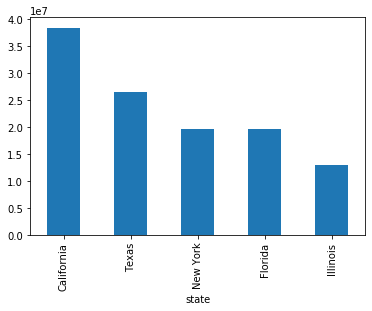

In [48]:
states['population'].plot.bar();

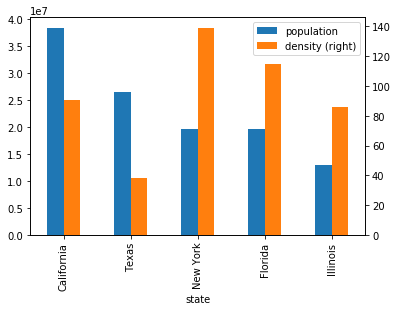

In [71]:
states[['population', 'density']].plot.bar(secondary_y='density');

Quelques remarques sur le passage à l'échelle lorsqu'on a des données volumineuses (big data):  
- si pas trop volumineux, choisir une machine plus puissante (CPU/RAM) : aisé si l'on travaille dans le cloud (Amazon AWS, Google Cloud, Microsoft Azure, etc.) mais ça a un impact sur le coût. 
- travailler sur un cluster de machines dans un framework distribué : Spark (pyspark dans notebooks, cloud ou "on premise") : voir le cours de Blaise Ngonmang _Outils pour le traitement des données massives-Big Data_
- cas du deep learning, voir le cours d'Emmanuel Viennet _Outils pour le Deep Learning_
 